# Surface Brightness Fluctuation Simulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# increase the obsearving distance by increasing the pixel area by 4
def increase_distance(galaxy):# galaxy array should be of size 2^n * 2^n
    num_pixel=int(len(galaxy)/2)# number of new pixel areas on one side
    T=[]
    for counter_i in range(num_pixel):
        for counter_j in range(num_pixel):
            i = 2 * counter_i
            j = 2 * counter_j
            pixel = (galaxy[i][j]+galaxy[i+1][j]+galaxy[i][j+1]+galaxy[i+1][j+1])/4
            T.append(pixel)
        
    T=np.reshape(np.array(T), (num_pixel, num_pixel))
    return T,np.std(T)

In [3]:
def get_stds(galaxy):
    
    num_dist = int(np.log(len(galaxy))/np.log(2))
    
    T=[]
    D=[]
    
    dist = 1  
    T.append(np.std(galaxy))
    D.append(dist)
    
    for y in range(num_dist):
        galaxy,std = increase_distance(galaxy)
        dist = dist * 2
        T.append(std)
        D.append(dist)
        
    inverse_dist = [ 1/d for d in D]
    
    print(T)
    print(inverse_dist)
    
    return T,inverse_dist

In [4]:
# the initial galaxy array of size 64 * 64, i.e. the galaxy observed in nearest distance
some_galaxy = np.reshape(np.random.rand(4096),(64,64))

x,y = get_stds(some_galaxy)

[0.2896485991499002, 0.1426160378279984, 0.0726579930821158, 0.034237598757064704, 0.01646195977516959, 0.007271894437013138, 0.0]
[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]


# Investigating the linear relation using Linear Regression

Slope:  3.4235424780611625
Mean squared error:  1.7690319708395864e-05
Coefficient of determination:  0.9998393285398337


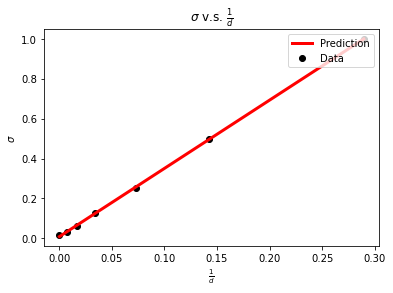

In [5]:
# Feature, 1/d
x = np.reshape(x, (-1,1))
# Label, variance
y = y

# Create a linear regression object
regr = linear_model.LinearRegression()

# Since the dataset is very small, we train and test on the whole set

# Train the model
regr.fit(x, y)

# Make predictions
y_pred = regr.predict(x)

# The slope
print('Slope: ', regr.coef_[0])

# The mean squared error
print('Mean squared error: ', mean_squared_error(y, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y, y_pred))

# Plot outputs
plt.scatter(x, y,  color='black', label='Data')
plt.plot(x, y_pred, 'r', label='Prediction',linewidth=3)
plt.title(r"$\sigma$ v.s. $\frac{1}{d}$")
plt.xlabel(r"$\frac{1}{d}$")
plt.ylabel(r"$\sigma$")
plt.legend(loc='upper right')
plt.show()

Since the mean squared error is quite low and the coefficient of determination is quite high, we can conclude that: $$\sigma \propto \frac{1}{d}$$